In [1]:
]activate ../../../

  Activating project at `~/UCLOneDrive/SpatialStructureInMicrobialCommunities/SSMCCode`


In [2]:
using GLMakie

In [3]:
using Revise
includet("./base.jl")
using StatsBase

In [4]:
using CairoMakie

# Space

In [313]:
f = jldopen("./main2_results.jld2")
logKs = f["logKs"]
ls = f["ls"]
sf = f["final_states"];
f

JLDFile /home/honza/UCLOneDrive/SpatialStructureInMicrobialCommunities/SSMCCode/cluster_env/runs/mm_v2_explike/main2_results.jld2 (read-only)
 ├─🔢 logKs
 ├─🔢 ls
 ├─🔢 params
 ├─🔢 retcodes
 ├─🔢 final_states
 ├─🔢 L
 ├─🔢 sN
 └─🔢 epsilon

## Looking at final state abundances

In [335]:
# final states averaged accros space
sfsums = map(sf) do su
    mean(su; dims=2)[:,1]
end;
sfstds = map(sf) do su
    std(su; dims=2)[:,1]
end;

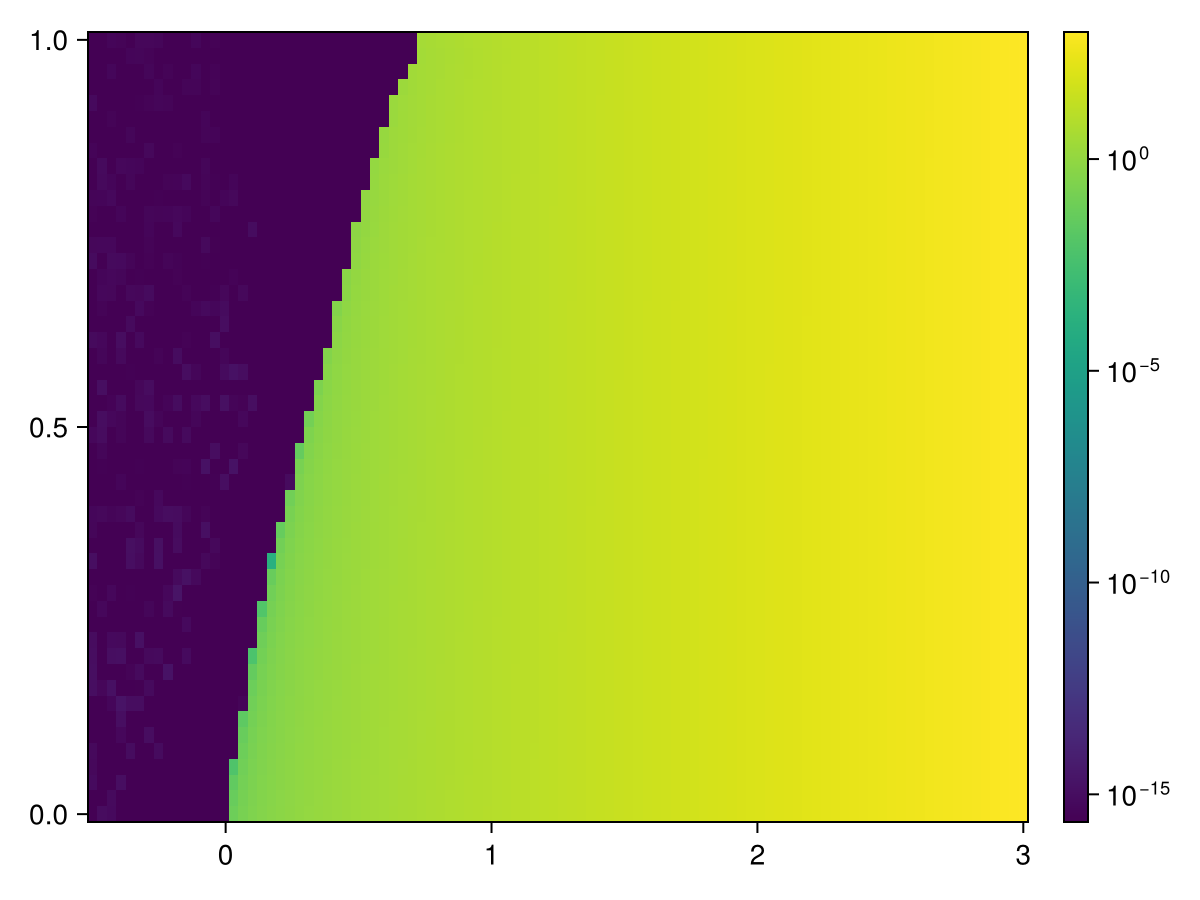

In [317]:
xx = getindex.(sfsums, 1)
yy = clamp.(xx, max(minimum(xx), eps()), Inf)
fap = heatmap(logKs, ls, yy;
    colorscale=log10
)
Colorbar(fap.figure[1,2], fap.plot)
fap

### Peaks in N

In [357]:
using Peaks

In [356]:
final_Ns = map(sf) do su
    su[1,:]
end;

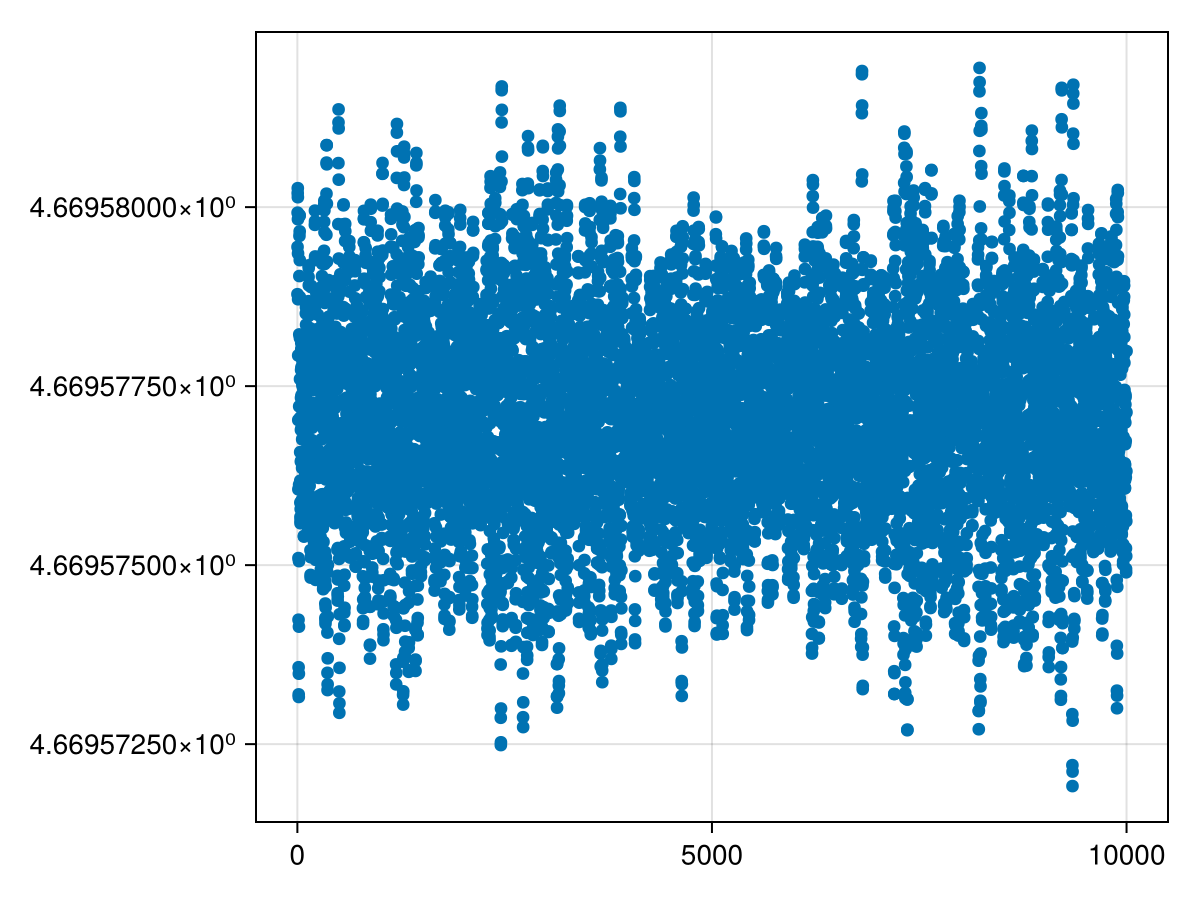

In [379]:
n = rand(final_Ns)
scatter(n)

In [ ]:
]st

┌ Warning: /home/honza/.julia/packages/CairoMakie/F8YX7/src/infrastructure.jl no longer exists, deleted all methods
└ @ Revise ~/.julia/packages/Revise/7QZSP/src/packagedef.jl:648
┌ Warning: /home/honza/.julia/packages/CairoMakie/F8YX7/src/primitives.jl no longer exists, deleted all methods
└ @ Revise ~/.julia/packages/Revise/7QZSP/src/packagedef.jl:648
┌ Warning: /home/honza/.julia/packages/Krylov/XuaiP/src/block_krylov_solvers.jl no longer exists, deleted all methods
└ @ Revise ~/.julia/packages/Revise/7QZSP/src/packagedef.jl:648
┌ Warning: /home/honza/.julia/packages/Krylov/XuaiP/src/krylov_solvers.jl no longer exists, deleted all methods
└ @ Revise ~/.julia/packages/Revise/7QZSP/src/packagedef.jl:648


In [ ]:
Peaks.find

In [390]:
sn = n[1:1000]

xx = findpeaks(sn, 100)

fap = scatter(1:length(sn), sn)
scatter!(fap.axis, xx.indices, xx.heights; marker=:cross)

fap

LoadError: UndefVarError: `findpeaks` not defined

### Comparing to no-space final abundances!

In [329]:
ns = m3r.final_states
ws = sfsums
Nns = getindex.(ns, 1)
Nws = getindex.(ws, 1);

In [331]:
minval = max(min(minimum(Nws), minimum(Nns)), eps())
maxval = max(maximum(Nws), maximum(Nns))
cNws = clamp.(Nws, minval, Inf)
cNns = clamp.(Nns, minval, Inf);

#### Plotting side by side

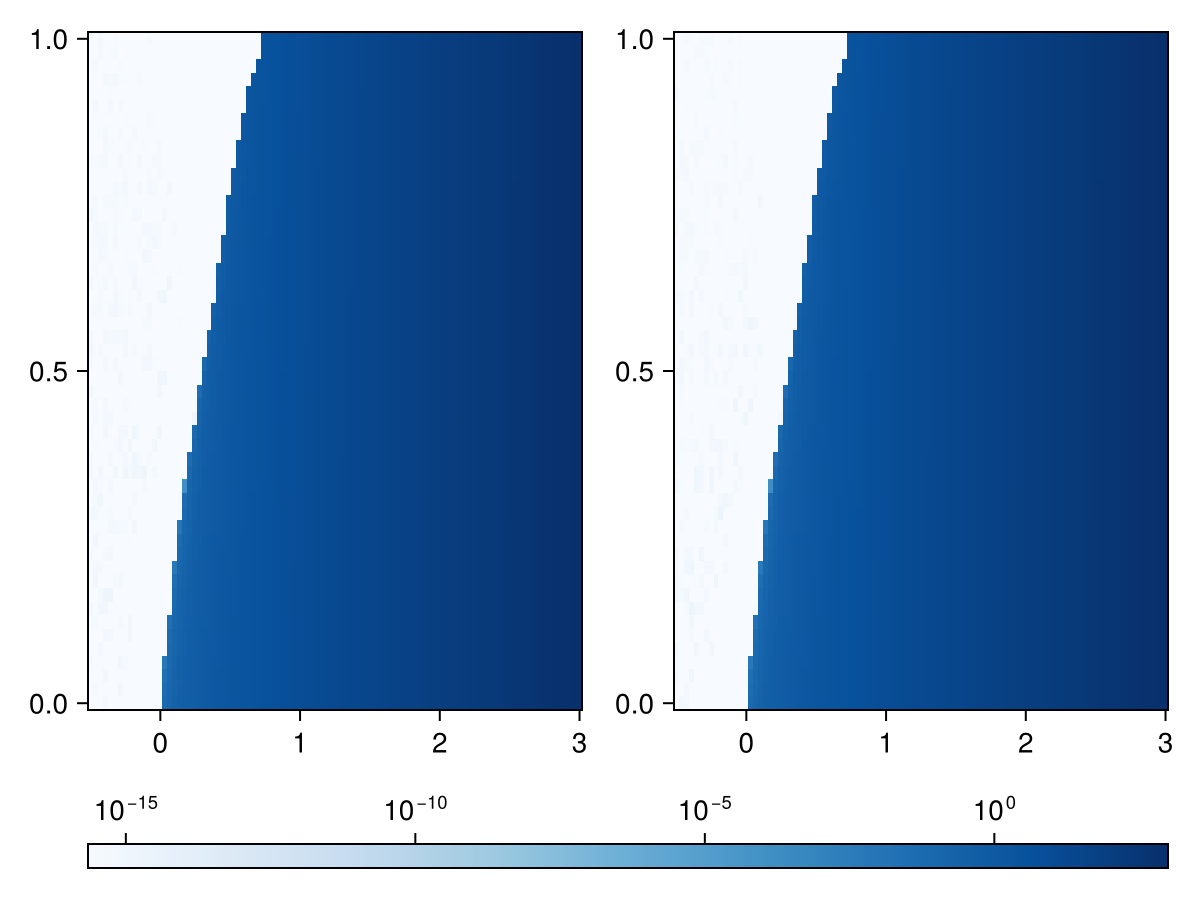

In [332]:
fig = Figure()
ax1 = Axis(fig[1,1])
ax2 = Axis(fig[1,2])

hm_kwargs = (;
    colormap=:Blues,
    colorrange=(minval, maxval),
    colorscale=log10
)

hm1 = heatmap!(ax1, logKs, ls, cNns; hm_kwargs...)
hm2 = heatmap!(ax2, logKs, ls, cNws; hm_kwargs...)

Colorbar(fig[2,:], hm1; vertical=false)


fig
# fap = heatmap(dN ./ (Nws .+ Nns);
# fap = heatmap(dN / (Nws .+ Nns);
    # colorscale=Makie.Symlog10(1000*eps())
    # colorscale=Makie.pseudolog10
# )
# Colorbar(fap.figure[1,2], fap.plot)
# fap

#### Correlation?

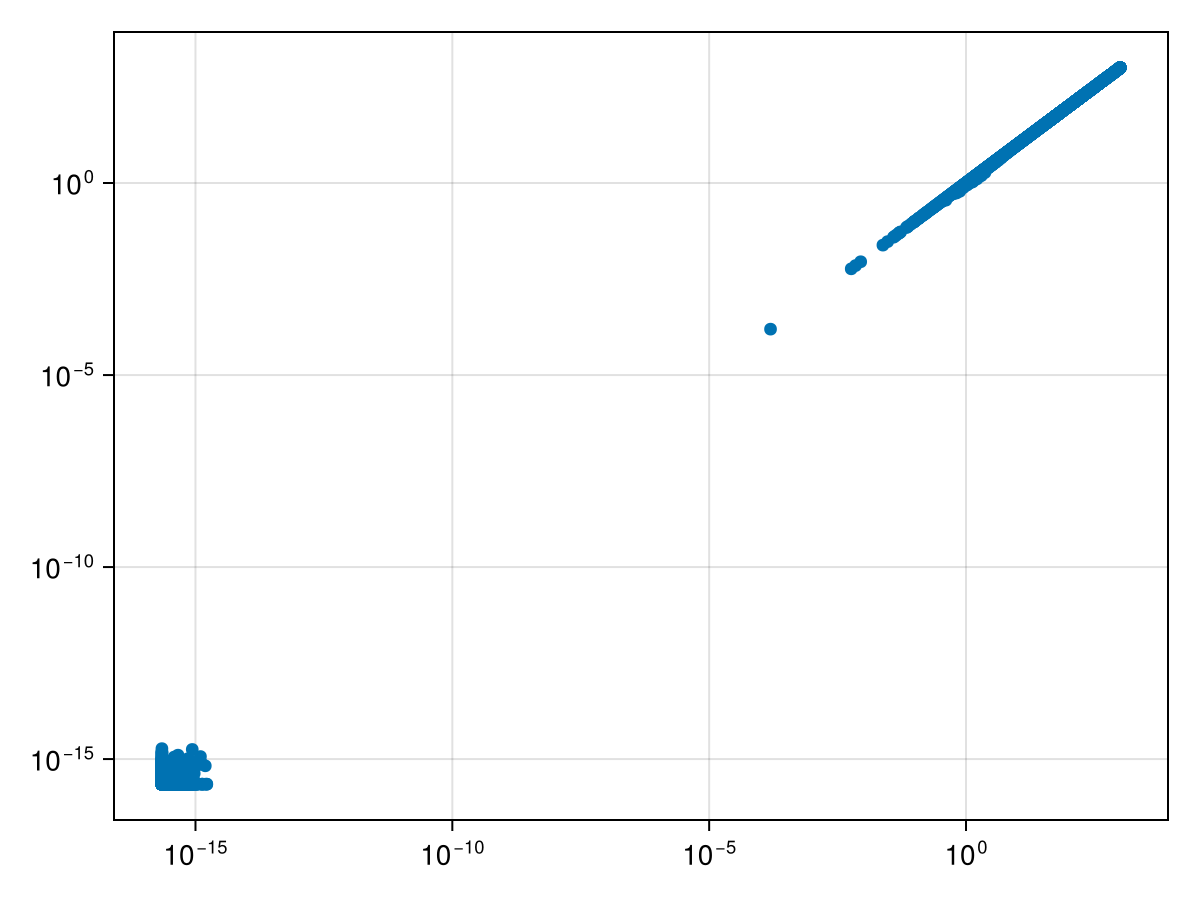

In [334]:
scatter(cNns[:], cNws[:];
    axis=(;
        xscale=log10,
        yscale=log10,
    )
)

#### Survivability only

In [263]:
thrh = 1e-10
surns = Nns .> thrh
surws = Nws .> thrh;

status = similar(surns, Int)
for i in eachindex(surns)
    status[i] = if !(surns[i]) && !(surws[i])
        1
    elseif !(surns[i]) && (surws[i])
        2
    elseif (surns[i]) && !(surws[i])
        3
    elseif (surns[i]) && (surws[i])
        4
    else
        throw(ErrorException("KAKAK"))
    end
end
countmap(status)

Dict{Int64, Int64} with 2 entries:
  4 => 3824
  1 => 1176

#### Looking at the difference

In [321]:
dN = Nws .- Nns;

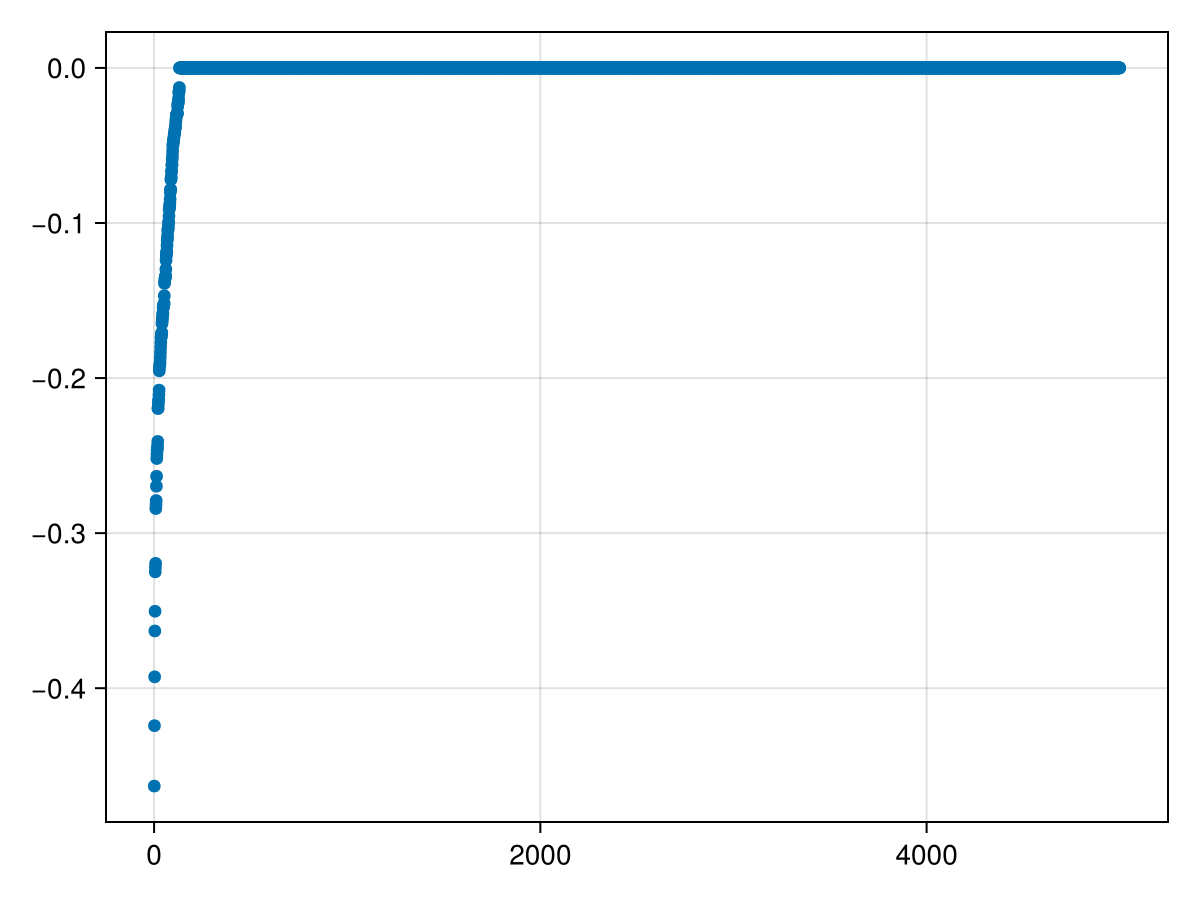

In [322]:
scatter(sort(dN[:]))

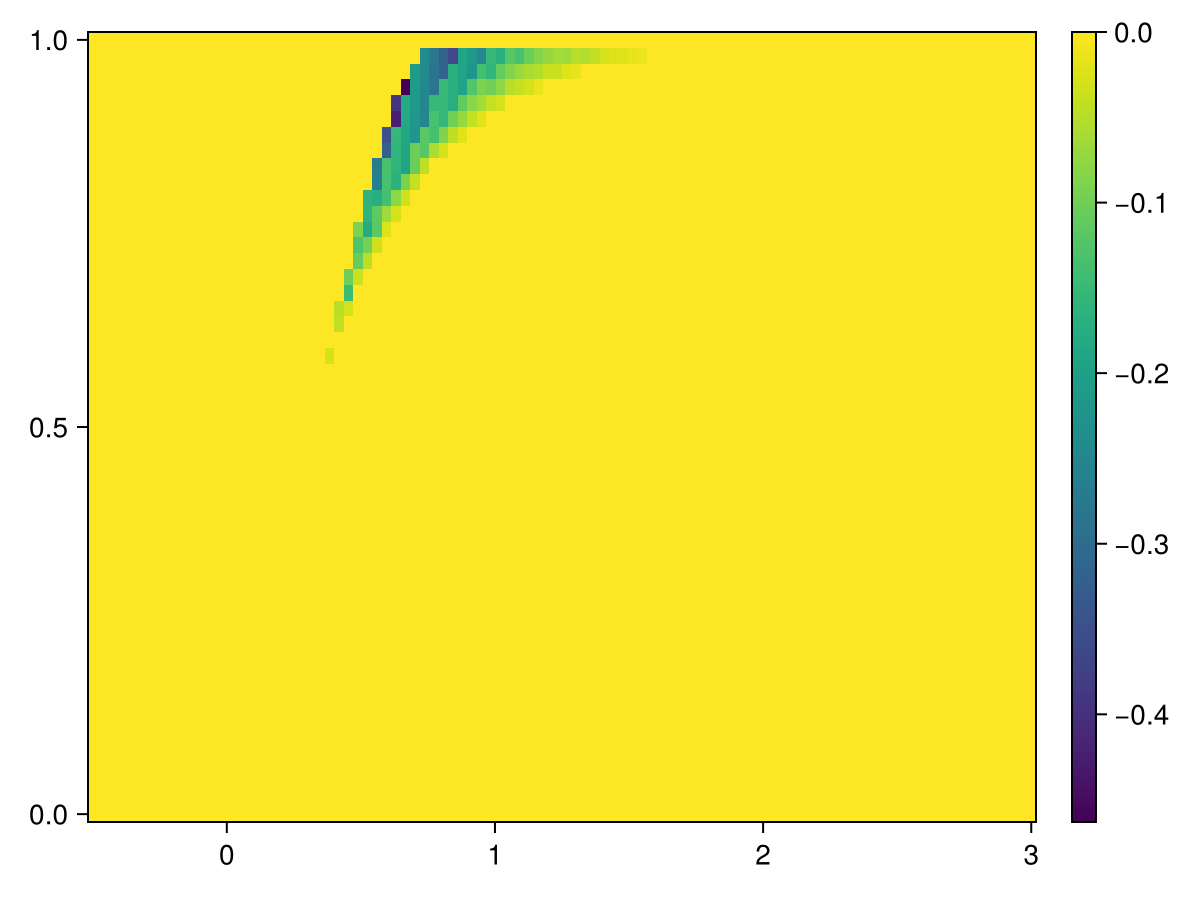

In [324]:
fap = heatmap(logKs, ls, dN;
# fap = heatmap(dN / (Nws .+ Nns);
    # colorscale=Makie.Symlog10(1000000*eps())
    # colorscale=Makie.pseudolog10
)
Colorbar(fap.figure[1,2], fap.plot)
fap

## Looking at the data first

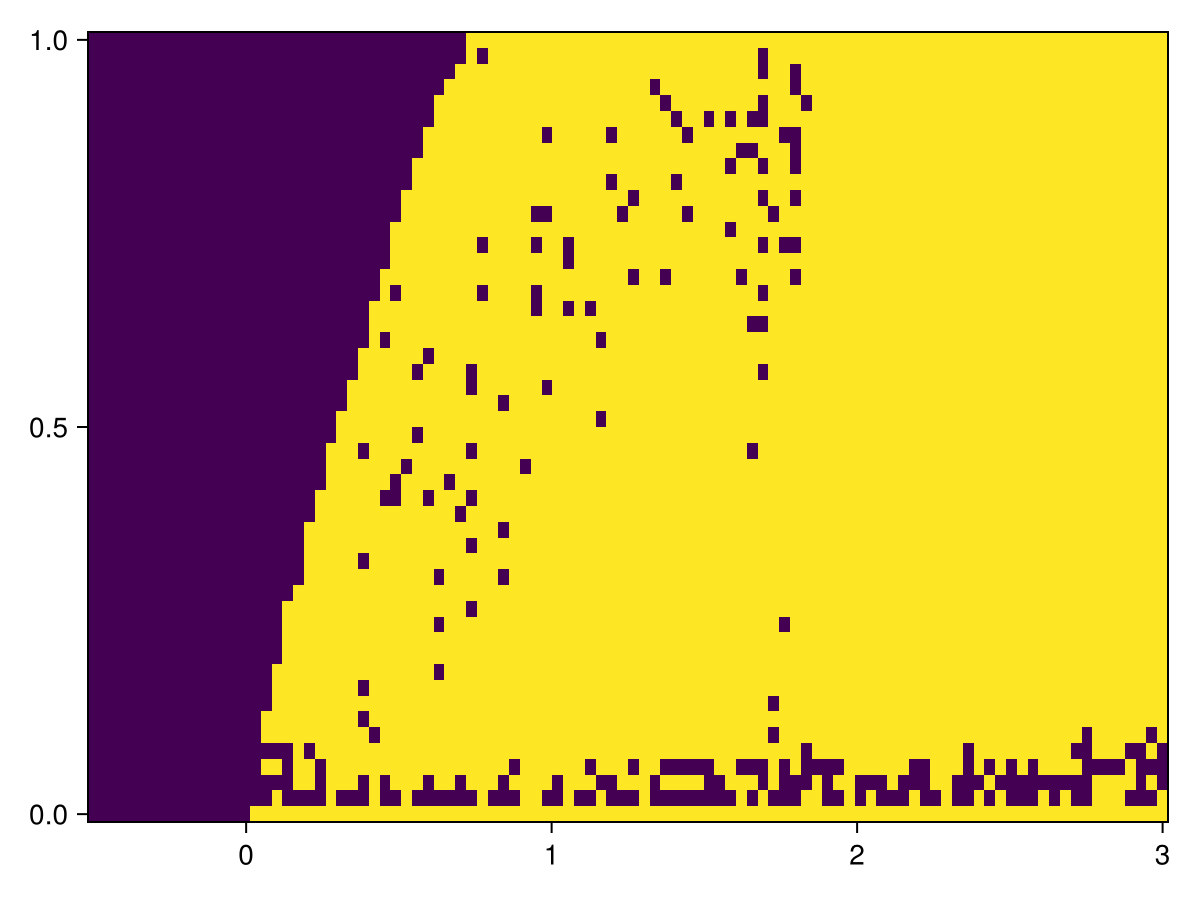

In [319]:
heatmap(f["logKs"], f["ls"], Int.(f["retcodes"]))

In [79]:
xx = findall(f["retcodes"][:,end-1]) do rc
    rc == ReturnCode.Success
end
show(xx)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 63]

In [74]:
xx = findall(f["retcodes"]) do rc
    rc == ReturnCode.Success
end;

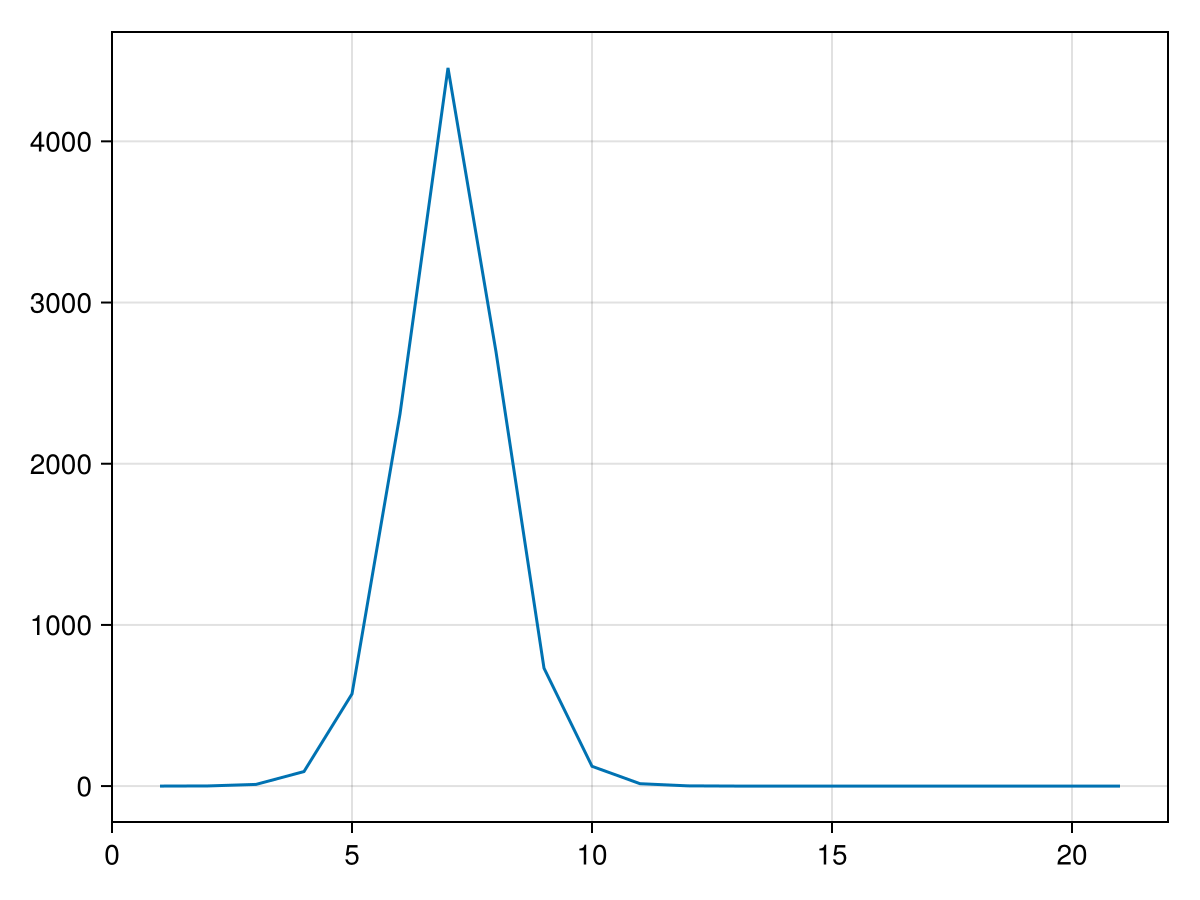

In [303]:
lines(sf[34,end-4][1,2140:2160])

# No-space

In [5]:
@time m3r = main3();

Progress: 100%|█████████████████████████████████████████| Time: 0:00:36


 37.395125 seconds (59.85 M allocations: 4.793 GiB, 1.98% gc time, 394.41% compilation time: <1% of which was recompilation)


In [6]:
countmap(m3r.retcodes)

Dict{SciMLBase.ReturnCode.T, Int64} with 1 entry:
  Success => 5000

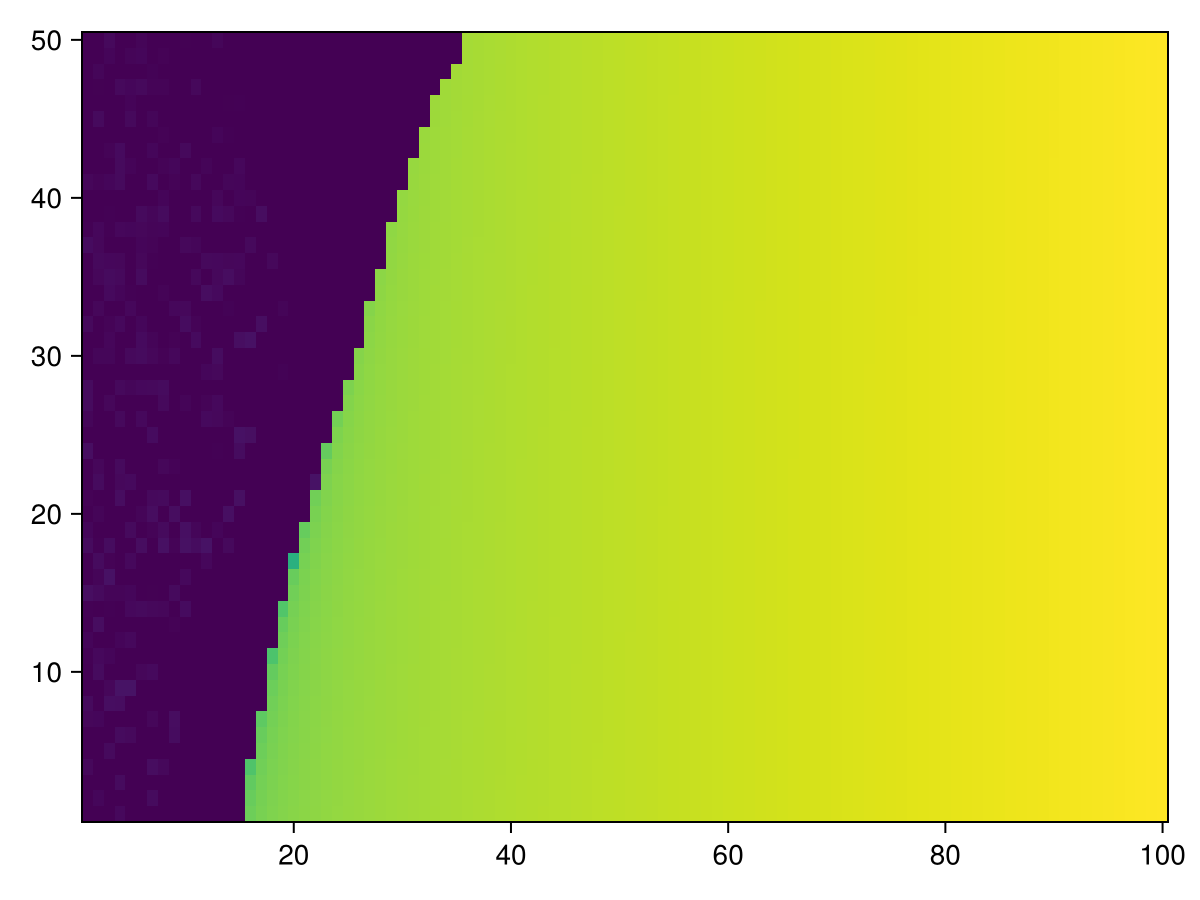

In [7]:
xx = getindex.(m3r.final_states, 1)
yy = clamp.(xx, max(minimum(xx), eps()), Inf)
heatmap(yy;
    colorscale=log10
)

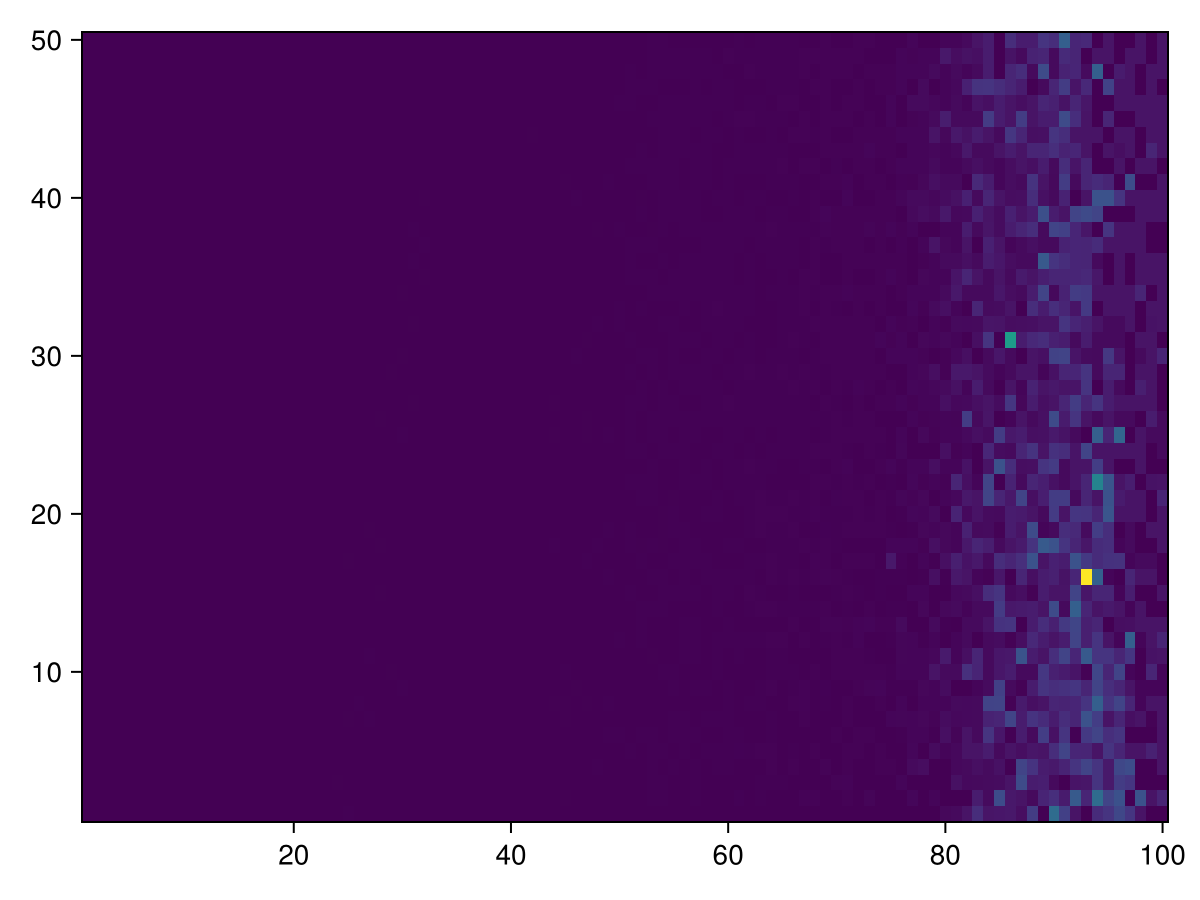

In [8]:
heatmap(maximum.(abs, mmicrmresid.(m3r.final_states, m3r.params)))